**<h1 align=center>LETS GROW MORE - Virtual Internship Program - Data Science Internship</h1>**

# <h2> TASK 1 - Intermediate Level - Exploratory Data Analysis on Dataset - Terrorism</h2>


<h3>Name - Viswanath Bodapati<br> Language - Python</h3>


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
import xgboost as xgb
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, KFold,GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler,RobustScaler,LabelEncoder,PowerTransformer
from sklearn.ensemble import GradientBoostingRegressor,StackingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

In [ ]:
try :
  data = pd.read_csv('/content/drive/MyDrive/globalterrorismdb_0718dist.csv', encoding ='latin =1',usecols = ['iyear','nkill','attacktype1','imonth','region','iday','country_txt','provstate','region_txt','nkillus','attacktype1_txt','target1','nkillus','nwound','summary','gname','targtype1_txt','weaptype1_txt','motive'])
except:
  print('err')

In [ ]:
data.head()

,iyear,imonth,iday,country_txt,region,region_txt,provstate,summary,attacktype1,attacktype1_txt,targtype1_txt,target1,gname,motive,weaptype1_txt,nkill,nkillus,nwound
0,1970,7,2,Dominican Republic,2,Central America & Caribbean,NaN,NaN,1,Assassination,Private Citizens & Property,Julio Guzman,MANO-D,NaN,Unknown,1.0,NaN,0.0
1,1970,0,0,Mexico,1,North America,Federal,NaN,6,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",23rd of September Communist League,NaN,Unknown,0.0,NaN,0.0
2,1970,1,0,Philippines,5,Southeast Asia,Tarlac,NaN,1,Assassination,Journalists & Media,Employee,Unknown,NaN,Unknown,1.0,NaN,0.0
3,1970,1,0,Greece,8,Western Europe,Attica,NaN,3,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,4,East Asia,Fukouka,NaN,7,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,Unknown,NaN,Incendiary,NaN,NaN,NaN


In [ ]:
data.describe()

,iyear,imonth,iday,region,attacktype1,nkill,nkillus,nwound
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,171378.000000,117245.000000,165380.000000
mean,2002.638997,6.467277,15.505644,7.160938,3.247547,2.403272,0.045981,3.167668
std,13.259430,3.388303,8.814045,2.933408,1.915772,11.545741,5.681854,35.949392
min,1970.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,5.000000,2.000000,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,6.000000,3.000000,0.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,10.000000,3.000000,2.000000,0.000000,2.000000
max,2017.000000,12.000000,31.000000,12.000000,9.000000,1570.000000,1360.000000,8191.000000


In [ ]:
data['killed']=data['nkill'].fillna(0)
data['wounded']=data['nwound'].fillna(0)
data['casualities']=data['nkill']+data['nwound']
data.head()

,iyear,imonth,iday,country_txt,region,region_txt,provstate,summary,attacktype1,attacktype1_txt,targtype1_txt,target1,gname,motive,weaptype1_txt,nkill,nkillus,nwound,killed,wounded,casualities
0,1970,7,2,Dominican Republic,2,Central America & Caribbean,NaN,NaN,1,Assassination,Private Citizens & Property,Julio Guzman,MANO-D,NaN,Unknown,1.0,NaN,0.0,1.0,0.0,1.0
1,1970,0,0,Mexico,1,North America,Federal,NaN,6,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",23rd of September Communist League,NaN,Unknown,0.0,NaN,0.0,0.0,0.0,0.0
2,1970,1,0,Philippines,5,Southeast Asia,Tarlac,NaN,1,Assassination,Journalists & Media,Employee,Unknown,NaN,Unknown,1.0,NaN,0.0,1.0,0.0,1.0
3,1970,1,0,Greece,8,Western Europe,Attica,NaN,3,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,Unknown,NaN,Explosives,NaN,NaN,NaN,0.0,0.0,NaN
4,1970,1,0,Japan,4,East Asia,Fukouka,NaN,7,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,Unknown,NaN,Incendiary,NaN,NaN,NaN,0.0,0.0,NaN


In [ ]:
data[['casualities']].groupby(data['country_txt']).sum().sort_values(by=['casualities'], ascending=False)

,casualities
country_txt,
Iraq,202982.0
Afghanistan,80213.0
Pakistan,64427.0
India,47108.0
Sri Lanka,29792.0
...,...
Andorra,0.0
Iceland,0.0
New Hebrides,0.0


In [ ]:
data[(data['country_txt']=='Iraq')]['provstate'].value_counts().head()

Baghdad     7644
Saladin     3411
Al Anbar    3299
Nineveh     3241
Diyala      3041
Name: provstate, dtype: int64

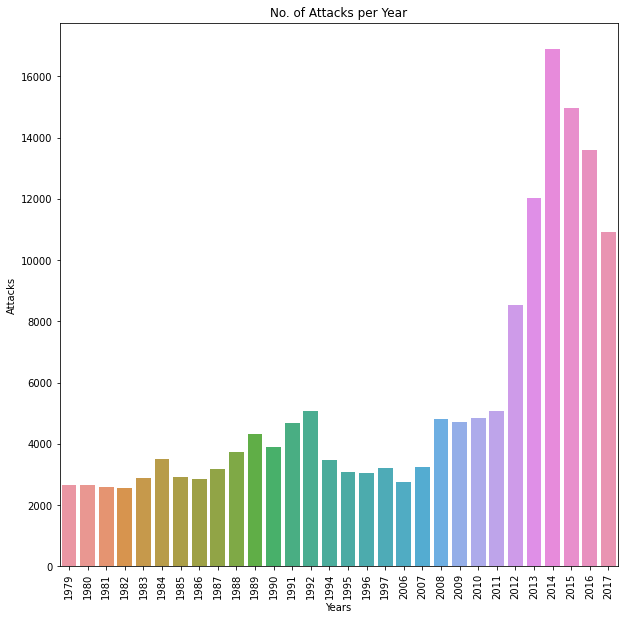

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x=data['iyear'].value_counts()[:30].index,y=data['iyear'].value_counts().values[:30])
plt.title('No. of Attacks per Year')
plt.xticks(rotation=90,fontsize=10)
plt.xlabel('Years', fontsize=10)
plt.ylabel('Attacks', fontsize=10)
plt.show()

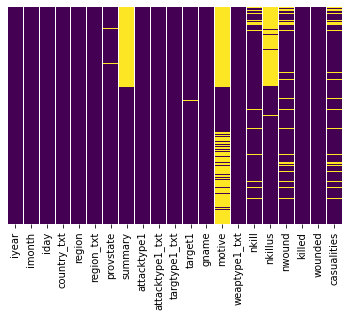

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar = False, cmap='viridis')

In [ ]:
data.corr()

,iyear,imonth,iday,region,attacktype1,nkill,nkillus,nwound,killed,wounded,casualities
iyear,1.000000,0.000139,0.018254,0.401384,0.074153,0.015341,-0.013828,0.015273,0.021252,0.017484,0.013934
imonth,0.000139,1.000000,0.005497,-0.002999,0.006705,0.003463,0.003891,0.002938,0.004031,0.003178,0.003446
iday,0.018254,0.005497,1.000000,0.009710,-0.005333,-0.003693,-0.001987,-0.001268,-0.003225,-0.001082,-0.001269
region,0.401384,-0.002999,0.009710,1.000000,0.007642,0.042062,-0.014609,0.020472,0.043113,0.019211,0.024857
attacktype1,0.074153,0.006705,-0.005333,0.007642,1.000000,0.002475,0.000946,0.000846,-0.003448,-0.001424,-0.001728
nkill,0.015341,0.003463,-0.003693,0.042062,0.002475,1.000000,0.487535,0.534375,1.000000,0.443119,0.690476
nkillus,-0.013828,0.003891,-0.001987,-0.014609,0.000946,0.487535,1.000000,0.869376,0.486977,0.868228,0.864087
nwound,0.015273,0.002938,-0.001268,0.020472,0.000846,0.534375,0.869376,1.000000,0.534190,1.000000,0.980387
killed,0.021252,0.004031,-0.003225,0.043113,-0.003448,1.000000,0.486977,0.534190,1.000000,0.443326,0.690476
wounded,0.017484,0.003178,-0.001082,0.019211,-0.001424,0.443119,0.868228,1.000000,0.443326,1.000000,0.980387


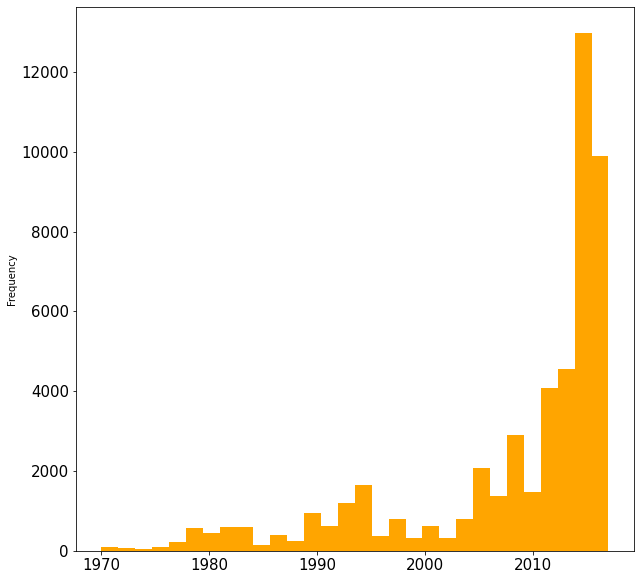

In [ ]:
med = data[data['region']==10]
med.iyear.plot(kind ='hist', bins =30, figsize =(10,10), color ='orange',fontsize=15)


In [ ]:
killdata = data.loc[:,'nkill']
attackdata = data.loc[:,'attacktype1':'attacktype1_txt']
typeKillData = pd.concat([attackdata,killdata],axis=1)
typeKillData = typeKillData.pivot_table(columns='attacktype1_txt',values='nkill',aggfunc='sum')
typeKillData

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
nkill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


In [ ]:
data['gname'].value_counts().head()

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Name: gname, dtype: int64

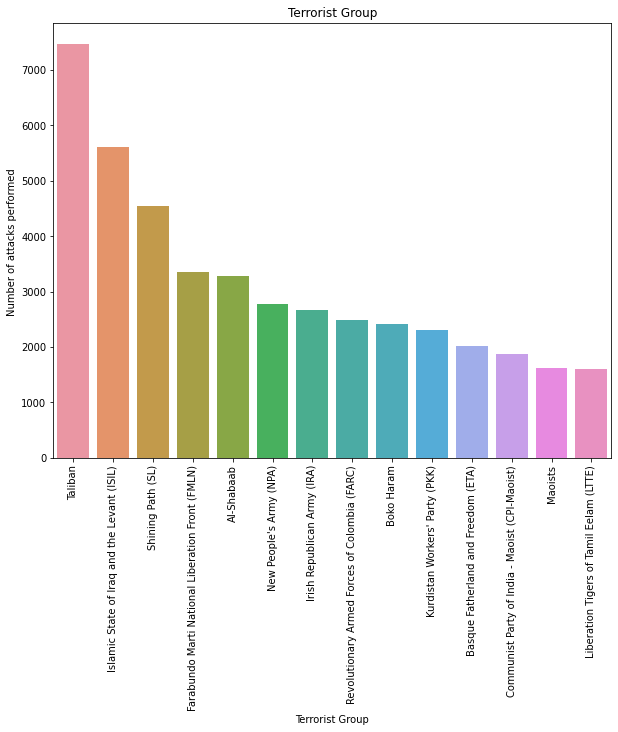

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=data['gname'].value_counts()[1:15].index,y=data['gname'].value_counts().values[1:15])
plt.title('Terrorist Group')
plt.xticks(rotation=90,fontsize=10)
plt.xlabel("Terrorist Group")
plt.ylabel("Number of attacks performed ")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


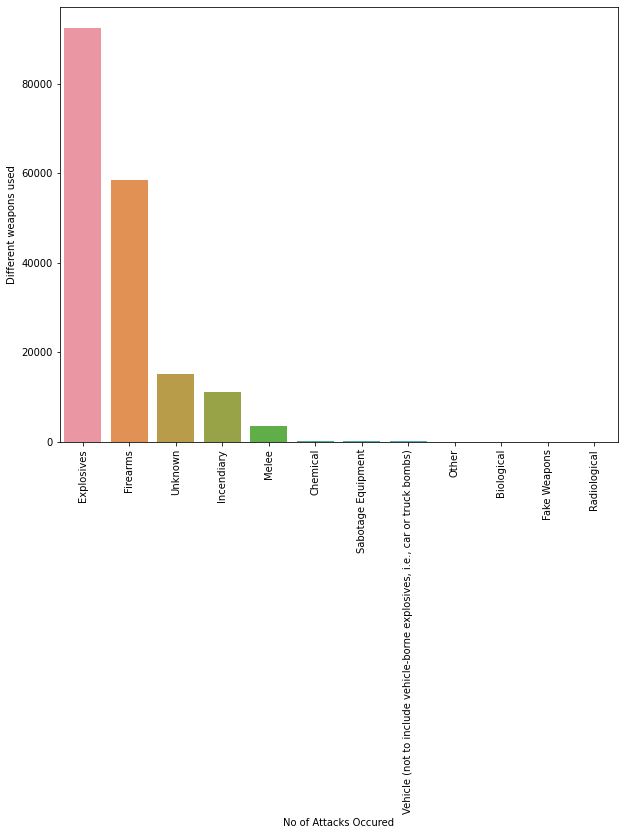

In [ ]:
plt.subplots(figsize=(10,8))
sns.countplot(data["weaptype1_txt"],order=data['weaptype1_txt'].value_counts().index)
plt.xticks(rotation=90, fontsize=10)
plt.xlabel("No of Attacks Occured", fontsize=10)
plt.ylabel("Different weapons used", fontsize=10)
plt.show()

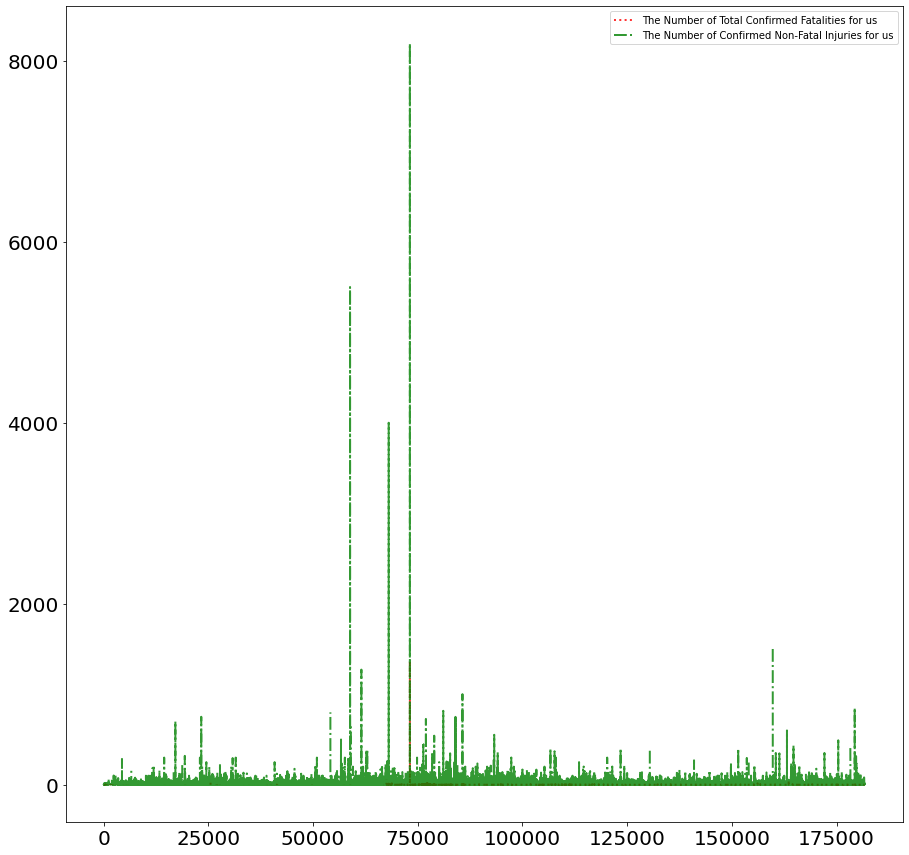

In [ ]:
data.nkillus.plot(kind = 'line', color ='red', label = 'The Number of Total Confirmed Fatalities for us', linewidth = 2,linestyle =':',alpha=0.8,figsize=(15,15),fontsize=20)
data.nwound.plot(kind = 'line', color ='green', label = 'The Number of Confirmed Non-Fatal Injuries for us', linewidth = 2,alpha = 0.8,linestyle ='-.',figsize=(15,15),fontsize=20)

plt.legend(loc='upper right')